<a href="https://colab.research.google.com/github/EmmaJaneShaw/Favorita/blob/main/FavoritaEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install anvil-uplink
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install patsy
!pip install statsmodels
!pip install black
!pip install lineapy
!pip install folium
!pip install descartes
!pip install geopandas
!pip install geopy
!pip install squarify
!pip install wget
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip
!pip install ipywidgets
!pip install pyyaml==5.4.1

In [2]:
from geopy.geocoders import Nominatim
import squarify
import folium
import branca
from folium.plugins import MarkerCluster
import webbrowser
import geopandas as gpd
import anvil.server
import wget
import lineapy
import plotly
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
from pandas_profiling import ProfileReport
import datetime as dt
import matplotlib.pyplot as plt
import xgboost as xgb 
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os #interact with operating system
import seaborn as sns #interactive plots
from pandas import set_option #view more of the dataframe
import random
import datetime as dt
import sys

pd.pandas.set_option('display.max_columns', None)

In [3]:
# Get the current working
# directory (CWD)
cwd = os.getcwd()
     
# Print the current working
# directory (CWD)
print("Current working directory:", cwd)

Current working directory: /content


In [4]:
stores = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/stores.csv')
items = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/items.csv')
oil = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/oil.csv', parse_dates=['date'])
holiday_events = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/holidays_events.csv', parse_dates=['date'])
transactions = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/transactions.csv', parse_dates=['date'])
train = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/train.csv', nrows=6000000, parse_dates=['date'])
train_large = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/train.csv', skiprows = 115000000, names = train.columns, parse_dates = ['date'])
test = pd.read_csv('/content/drive/MyDrive/Favorita Grocery/test.csv', parse_dates=['date'])

**STORES EDA**

In [ ]:
stores_profile = ProfileReport(stores, title="Pandas Profiling Report")
stores_profile.to_notebook_iframe()


MAP STORES

In [18]:
stores_map = stores.copy()
stores_map['country'] = 'Ecuador'
stores_map['full_address'] = stores_map.city + ',' + stores_map.state + ',' + stores_map.country
stores_map['count'] = stores_map['city'].map(stores_map['city'].value_counts())
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
stores_map['gcode'] = stores_map.full_address.apply(geolocator.geocode)
stores_map['lat'] = [g.latitude for g in stores_map.gcode]
stores_map['long'] = [g.longitude for g in stores_map.gcode]
print(stores_map)

    store_nbr           city                           state type  cluster  \
0           1          Quito                       Pichincha    D       13   
1           2          Quito                       Pichincha    D       13   
2           3          Quito                       Pichincha    D        8   
3           4          Quito                       Pichincha    D        9   
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4   
5           6          Quito                       Pichincha    D       13   
6           7          Quito                       Pichincha    D        8   
7           8          Quito                       Pichincha    D        8   
8           9          Quito                       Pichincha    B        6   
9          10          Quito                       Pichincha    C       15   
10         11        Cayambe                       Pichincha    B        6   
11         12      Latacunga                        Cotopaxi    

Map out the 22 different cities that have stores

In [19]:
cities_map = folium.Map(location=(-0.180653,-78.467834), zoom_start=5)

for index, row in stores_map.iterrows():
  folium.Marker(location=(row['lat'],row['long'])).add_to(cities_map)

display(cities_map)

**ITEMS EDA**

In [23]:
items_profile = ProfileReport(items, title="Pandas Profiling Report")
items_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

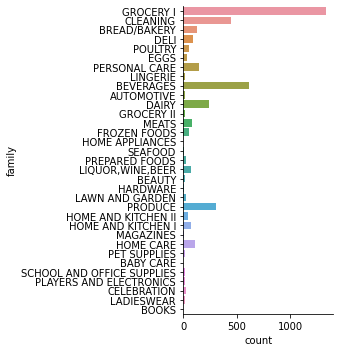

In [21]:
sns.catplot(y="family", kind="count",data=items)

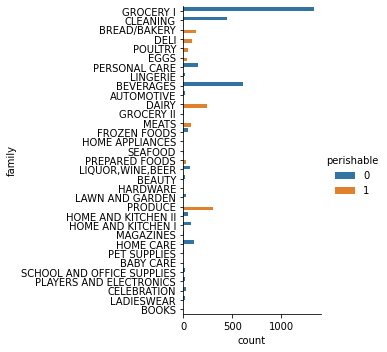

In [22]:
sns.catplot(y="family", hue="perishable",kind="count",data=items)

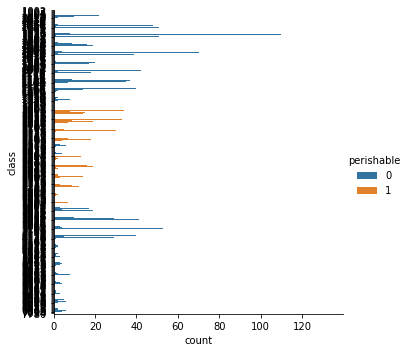

In [24]:
sns.catplot(y="class", hue="perishable",kind="count",data=items)

In [ ]:
oil_profile = ProfileReport(oil, title="Pandas Profiling Report")
oil_profile.to_notebook_iframe()

**Transactions Data**

In [31]:
transactions_profile = ProfileReport(transactions, title="Pandas Profiling Report")
transactions_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [102]:
transactions_date = transactions.set_index("date")
# create new columns from datetime index
transactions_date["year"] = transactions_date.index.year
transactions_date["month"] = transactions_date.index.month
transactions_date["week"] = transactions_date.index.week
transactions_date["dayofweek"] = transactions_date.index.weekday
# new dataframe
transactions_date.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


store_nbr  transactions  year  month  week  dayofweek
date                                                             
2013-01-01         25           770  2013      1     1          1
2013-01-02          1          2111  2013      1     1          2
2013-01-02          2          2358  2013      1     1          2
2013-01-02          3          3487  2013      1     1          2
2013-01-02          4          1922  2013      1     1          2

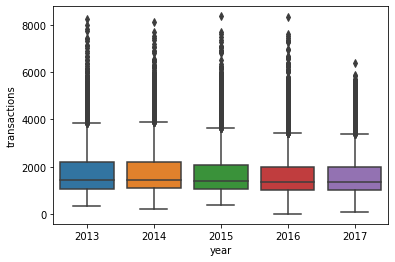

In [103]:
# boxplots by year
sns.boxplot(x = 'year', y='transactions', data = transactions_date)

In [ ]:
# boxplots by year
sns.boxplot(x = 'store_nbr', y='transactions', data = transactions_date)

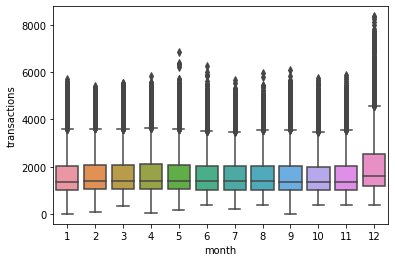

In [104]:
# boxplots by month
sns.boxplot(x = 'month', y='transactions', data = transactions_date)

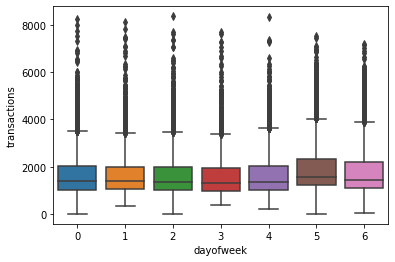

In [105]:
# boxplots by week
sns.boxplot(x = 'dayofweek', y='transactions', data = transactions_date)

In [130]:
fig = px.histogram(transactions_date, x='month', y='transactions',
             color='store_nbr',barmode='group',histfunc='avg',
             height=400)
fig.show()

In [30]:
holiday_events_profile = ProfileReport(holiday_events, title="Pandas Profiling Report")
holiday_events_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
#examine the dates to determine duration and spread of values.
print('min-max for oil date:',(min(oil['date']),max(oil['date'])))
print('min-max for tranactions date :',(min(transactions['date']),max(transactions['date'])))
print('min-max for holiday_events date :',(min(holiday_events['date']),max(holiday_events['date'])))
print('min-max for test date :',(min(test['date']),max(test['date'])))
print('min-max for train date :',(min(train_large['date']),max(train_large['date'])))

min-max for oil date: (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))
min-max for tranactions date : (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))
min-max for holiday_events date : (Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))
min-max for test date : (Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
min-max for train date : (Timestamp('2017-05-08 00:00:00'), Timestamp('2017-08-15 00:00:00'))


Examine 2017 **only** based on training dates

In [71]:
start_date = '2017-01-01'
end_date = '2017-08-31'
after_start_date = oil["date"] >= start_date
before_end_date = oil["date"] <= end_date
between_two_dates = after_start_date & before_end_date
# Using pandas.DataFrame.loc to Filter Rows by Dates
oil_2017 = oil.loc[between_two_dates]
oil_2017.head()

date  dcoilwtico
1044 2017-01-02         NaN
1045 2017-01-03       52.36
1046 2017-01-04       53.26
1047 2017-01-05       53.77
1048 2017-01-06       53.98

In [72]:
oil_2017 = oil_2017.set_index("date")
# create new columns from datetime index

oil_2017["month"] = oil_2017.index.month
oil_2017["week"] = oil_2017.index.week
oil_2017["day"] = oil_2017.index.day
# new dataframe
oil_2017.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


dcoilwtico  month  week  day
date                                    
2017-01-02         NaN      1     1    2
2017-01-03       52.36      1     1    3
2017-01-04       53.26      1     1    4
2017-01-05       53.77      1     1    5
2017-01-06       53.98      1     1    6

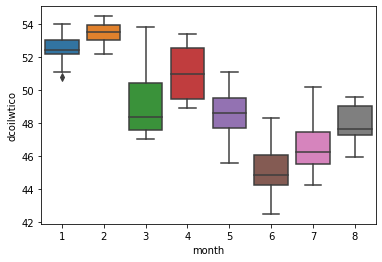

In [73]:
# boxplots by month
sns.boxplot(x = 'month', y='dcoilwtico', data = oil_2017)

In [110]:
start_date = '2017-01-01'
end_date = '2017-8-15'
after_start_date = transactions["date"] >= start_date
before_end_date = transactions["date"] <= end_date
between_two_dates = after_start_date & before_end_date
# Using pandas.DataFrame.loc to Filter Rows by Dates
transactions_2017 = transactions.loc[between_two_dates]
transactions_2017.head()




date  store_nbr  transactions
71391 2017-01-01         25          1642
71392 2017-01-02          1           516
71393 2017-01-02          2          2083
71394 2017-01-02          3          3918
71395 2017-01-02          4          1682

In [111]:
transactions_2017 = transactions_2017.set_index("date")
# create new columns from datetime index

transactions_2017["month"] = transactions_2017.index.month
transactions_2017["week"] = transactions_2017.index.week
transactions_2017["dayofweek"] = transactions_2017.index.weekday
# new dataframe
transactions_2017.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


store_nbr  transactions  month  week  dayofweek
date                                                       
2017-01-01         25          1642      1    52          6
2017-01-02          1           516      1     1          0
2017-01-02          2          2083      1     1          0
2017-01-02          3          3918      1     1          0
2017-01-02          4          1682      1     1          0

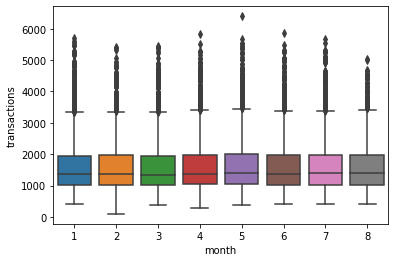

In [89]:
# boxplots by month
sns.boxplot(x = 'month', y='transactions', data = transactions_2017)

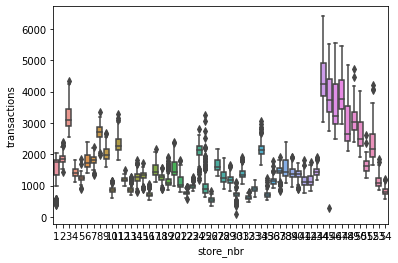

In [114]:
sns.boxplot( x = 'store_nbr', y='transactions', data = transactions_2017)

In [132]:
fig = px.histogram(transactions_2017, x='dayofweek', y='transactions',
             color='store_nbr',barmode='group',histfunc='avg',
             height=400)
fig.show()

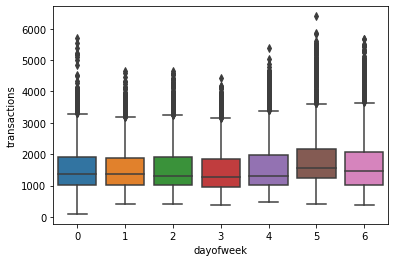

In [91]:
# boxplots by month
sns.boxplot(x = 'dayofweek', y='transactions', data = transactions_2017)

In [55]:
start_date = '2017-01-01'
end_date = '2017-8-15'
after_start_date = holiday_events["date"] >= start_date
before_end_date = holiday_events["date"] <= end_date
between_two_dates = after_start_date & before_end_date
# Using pandas.DataFrame.loc to Filter Rows by Dates
holiday_events_2017 = holiday_events.loc[between_two_dates]
holiday_events_2017.head()

date      type    locale locale_name                  description  \
297 2017-01-01   Holiday  National     Ecuador           Primer dia del ano   
298 2017-01-02  Transfer  National     Ecuador  Traslado Primer dia del ano   
299 2017-02-27   Holiday  National     Ecuador                     Carnaval   
300 2017-02-28   Holiday  National     Ecuador                     Carnaval   
301 2017-03-02   Holiday     Local       Manta           Fundacion de Manta   

     transferred  
297         True  
298        False  
299        False  
300        False  
301        False

Empty DataFrame
Columns: [date, type, locale, locale_name, description, transferred]
Index: []